In [1]:
# Library
# Library
import nltk
import random
import re
import csv
import urllib.request
import numpy as np
import pandas as pd
from nltk import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, manifold

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Define the URL and filenames for each book
books = [
    {"url": "https://www.gutenberg.org/files/16/16-0.txt", "filename": "Peter_Pen.txt"},
    {"url": "https://www.gutenberg.org/files/74/74-0.txt", "filename": "The_Adventures_of_Tom_Sawyer.txt"},
    {"url": "https://www.gutenberg.org/cache/epub/120/pg120.txt", "filename": "Treasure_Island.txt"},
    {"url": "https://www.gutenberg.org/files/289/289-0.txt", "filename": "The_Wind_in_the_Willows.txt"},
    {"url": "https://www.gutenberg.org/cache/epub/17396/pg17396.txt", "filename": "The_Secret_Garden.txt"},
    {"url": "https://www.gutenberg.org/cache/epub/1342/pg1342.txt", "filename": "Pride_and_Prejudice.txt"},
    {"url": "https://www.gutenberg.org/files/1661/1661-0.txt", "filename": "The_Adventures_of_Sherlock_Holmes.txt"},
]

# Download and save each book
for book in books:
    url = book["url"]
    filename = book["filename"]
    urllib.request.urlretrieve(url, filename)
    print(f"{filename} has been saved.")


Peter_Pen.txt has been saved.
The_Adventures_of_Tom_Sawyer.txt has been saved.
Treasure_Island.txt has been saved.
The_Wind_in_the_Willows.txt has been saved.
The_Secret_Garden.txt has been saved.
Pride_and_Prejudice.txt has been saved.
The_Adventures_of_Sherlock_Holmes.txt has been saved.


# Choice five books have the same genres and semantically the same
## Download: https://www.gutenberg.org
# Children literature
'Peter Pen" by J. M. Barrie
https://www.gutenberg.org/files/16/16-0.txt

"The Adventures of Tom Sawyer" by Mark Twain
https://www.gutenberg.org/files/74/74-0.txt

"The Wind in the Willows" by Kenneth Grahame
https://www.gutenberg.org/files/289/289-0.txt

"The Secret Garden" by Frances Hodgson Burnett
https://www.gutenberg.org/cache/epub/17396/pg17396.txt

"Treasure Island" by Robert Louis Stevenson
https://www.gutenberg.org/cache/epub/120/pg120.txt

# Another text book by the different genre
# romance fiction
"Pride and Prejudice" by Jane Austen
https://www.gutenberg.org/cache/epub/1342/pg1342.txt

# mystery fiction
"The Adventures of Sherlock Holmes" by Sir Arthur Conan Doyle
https://www.gutenberg.org/files/1661/1661-0.txt

In [4]:
def sample_digital_book(book_name, num_partitions, size_partition):
    
    # Download the digital book from the local directory
    book_file = open(book_name, "r", encoding='utf-8')
    book = book_file.read()
    book_file.close()

    # use 'word_tokenize' function to tokenize the book into words.
    # Then, divide digital book into each partitions of the specified size (100 words)
    partitions = nltk.word_tokenize(book)
    partitions = [partitions[i : i+size_partition] for i in range(0, len(partitions), size_partition)]
    
    # Check num_partitions is valid
    if num_partitions > len(partitions) or num_partitions < 0:
        num_partitions = len(partitions)
    partitions = partitions[:num_partitions]
    
    # Create labels
    labels = [book_name[:1]]
    # Repeat the labels for the number of times that can fit in the partitions
    label_list = labels*(num_partitions//len(labels))
    # Get the remainder labels that are needed.
    label_list += labels[:num_partitions%len(labels)]
    
    
    # Use regular expression to manipulate the text
    # and the regular expression r'[^\w\s]' is used to remove non-alphanumeric characters from the text.
    partitions = [[re.sub(r'[^\w\s]', '', word) for word in partition] for partition in partitions]
    
    # Remove empty strings from the list
    partitions = [[word for word in partition if word] for partition in partitions]

#added by Nan
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    partitions = [[word for word in partition if word.lower() not in stop_words] for partition in partitions]

    # Stemming
    stemmer = PorterStemmer()
    partitions = [[stemmer.stem(word) for word in partition] for partition in partitions]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    partitions = [[lemmatizer.lemmatize(word) for word in partition] for partition in partitions]

#added stoped
    # Create pandas dataframe to store the text data
    data = {'partition': partitions, 'label': label_list}
    df = pd.DataFrame(data) 

    # Serialize dataframe to csv
    df.to_csv(book_name + '.csv', index=False)
    
    return partitions

In [5]:
# Testing for multiple books:
book_name1 = "Peter_Pen.txt"
book_name2 = "The_Adventures_of_Tom_Sawyer.txt"
book_name3 = "Treasure_Island.txt"
book_name4 = "The_Wind_in_the_Willows.txt"
book_name5 = "The_Secret_Garden.txt"
book_name6 = "Pride_and_Prejudice.txt"
book_name7 = "The_Adventures_of_Sherlock_Holmes.txt"
book_list = [book_name1, book_name2, book_name3, book_name4, book_name5, book_name6, book_name7]
# If book_list > label_list, add "f","g",etc.
label_list = ["a","b","c","d","e","f","g"]
df_list = []
for i, book_name in enumerate(book_list):
    partitions = sample_digital_book(book_name, 200, 100)
    temp = pd.DataFrame({'partition': partitions, 'label': label_list[i]})
    df_list.append(temp)

df = pd.concat(df_list)
df.to_csv("Children_Literature_books_data.csv", index=False)



# Feature Engineering


In [6]:

# Load the data from the csv file
df = pd.read_csv("Children_Literature_books_data.csv")

sw_nltk = stopwords.words('english')
print(sw_nltk)
print(df['partition'].tolist())
# Convert the data into a Bag-of-Words representation using CountVectorizer
count_vectorizer = CountVectorizer(stop_words=sw_nltk)
count_matrix = count_vectorizer.fit_transform(df['partition'].to_list())

# Convert the data into a TF-IDF representation using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=sw_nltk)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['partition'].to_list())

#n-gram
# Initialize the CountVectorizer object
vectorizer = CountVectorizer(ngram_range=(2, 2))
# Fit and transform the data into n-grams
ngram_matrix = vectorizer.fit_transform(df['partition'].to_list())


# Get the feature names
feature_names_bow = count_vectorizer.get_feature_names_out()
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
feature_names_ngram = vectorizer.get_feature_names_out()

# Store the BOW and TF-IDF representations as separate dataframes
df_bow = pd.DataFrame(count_matrix.toarray(), columns=feature_names_bow)
print("Here is the BOW result:",df_bow)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_tfidf)
print("Here is the TF-IDF result:",df_tfidf)
df_ngram=pd.DataFrame(ngram_matrix.toarray(),columns=feature_names_ngram)
print("Here is the n-gram result:", df_ngram)


#Visualization


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Here is the BOW result:       10  100  105  108  109  11  111  113  114  118  ...  youngest  youngman  \
0      0    0    0    0    0   0    0    0    0    0  ...         0         0   
1      0    0    0    0    0   0    0    0    0    0  ...         0         0   
2      0    0    0    0    0   0    0    0    0    0  ...         0         0   
3      0    0    0    0    0   0    0    0    0    0  ...         0         0   
4      0    0    0    0    0   0    0    0    0    0  ...         0         0   
...   ..  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...       ...       ...   
1395   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1396   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1397   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1398   0    0    0    0    0   0    0    0    0    0  ...         0         0   
1399   0    0    0    0    0   0    0    0    0    0  ...         0         0   

   

# Visualization

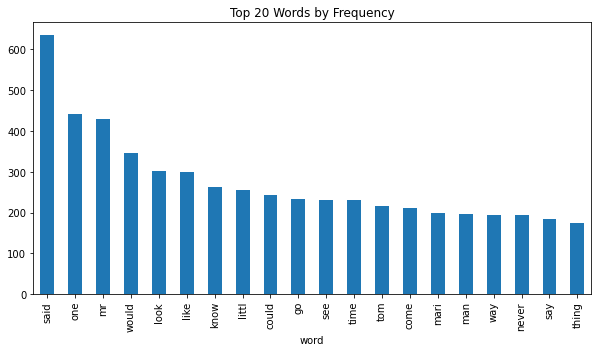

In [7]:

# Get word frequency counts from the CountVectorizer object
word_freq = count_matrix.toarray().sum(axis=0)

# Create a dataframe of words and their frequency
word_df = pd.DataFrame({'word': feature_names_bow, 'freq': word_freq})
word_df.sort_values('freq', ascending=False, inplace=True)

# Plot the top n words
n = 20
word_df[:n].plot.bar(x='word', y='freq', legend=False, figsize=(10,5))
plt.title('Top {} Words by Frequency'.format(n))
plt.show()

# Split train and test set

In [8]:
df

,partition,label
0,"['project', 'gutenberg', 'ebook', 'peter', 'pa...",a
1,"['peter', 'pan', 'peter', 'pan', 'wendi', 'aut...",a
2,"['digit', 'copyright', 'claim', 'consist', 'cu...",a
3,"['stori', 'chapter', 'xii', 'child', 'carri', ...",a
4,"['ran', 'mother', 'suppos', 'must', 'look', 'r...",a
...,...,...
1395,"['meantim', 'Mr', 'merryweath', 'must', 'put',...",g
1396,"['though', 'shall', 'take', 'disadvantag', 'ma...",g
1397,"['absolut', 'dark', 'never', 'experienc', 'sme...",g
1398,"['ask', 'jone', 'inspector', 'two', 'offic', '...",g


In [207]:
from sklearn.model_selection import train_test_split
x = df['partition']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Cross validation -- Confusion Matrix and accuracy

In [208]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import cross_val_score,  cross_val_predict, StratifiedKFold

def analysis(pipeline, data, label):
    
    #cross validation
    cv = StratifiedKFold(n_splits=10)
    
    y_pred = cross_val_predict(pipeline, data, label, cv=cv)
    accuracy = np.mean(label == y_pred)
    print('Accuracy:' + str(accuracy))

    # confusion matrix   
    cm = confusion_matrix(label, y_pred)
    unique_labels = np.unique(df['label'])
    draw_confusion_matrix(cm, unique_labels)
    print (classification_report(label, y_pred))
    

In [209]:
import matplotlib.pyplot as plt
def draw_confusion_matrix(cf_matrix, labels):
    cm_df = pd.DataFrame(cf_matrix, labels, labels)
    plt.figure(figsize=(len(labels),len(labels)))
    sns.heatmap(cf_matrix, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

# Create bow, tfidf and n_gram vectorizer

In [210]:
bow = CountVectorizer(stop_words=sw_nltk)
tfidf = TfidfVectorizer(stop_words=sw_nltk)
n_gram =  CountVectorizer(ngram_range=(2, 2))

vectorizer_dict = {'BOW':bow, 'TF-IDF':tfidf, 'N-gram':n_gram}

# KNN -- find best k with BOW, TFIDF and N-gram

The report for KNN with BOW
The best value k is 21
Accuracy:0.56


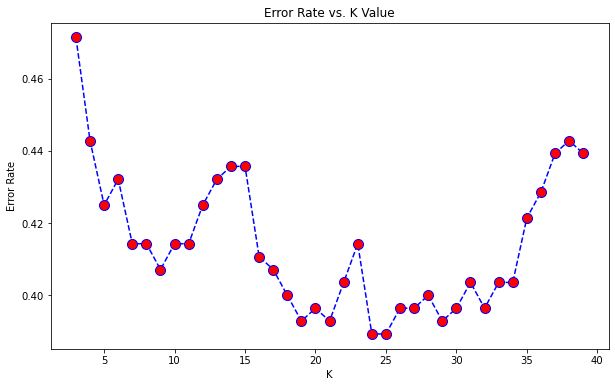

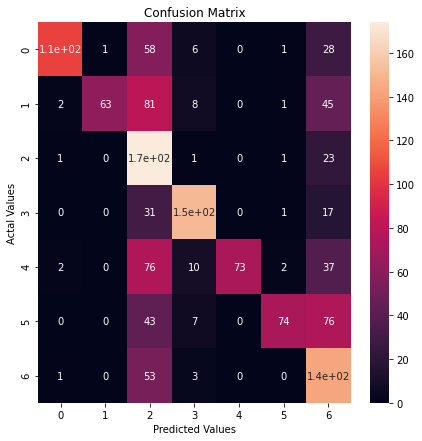

              precision    recall  f1-score   support

           a       0.95      0.53      0.68       200
           b       0.98      0.32      0.48       200
           c       0.34      0.87      0.49       200
           d       0.81      0.76      0.78       200
           e       1.00      0.36      0.53       200
           f       0.93      0.37      0.53       200
           g       0.39      0.71      0.50       200

    accuracy                           0.56      1400
   macro avg       0.77      0.56      0.57      1400
weighted avg       0.77      0.56      0.57      1400



The report for KNN with TF-IDF
The best value k is 19
Accuracy:0.8578571428571429


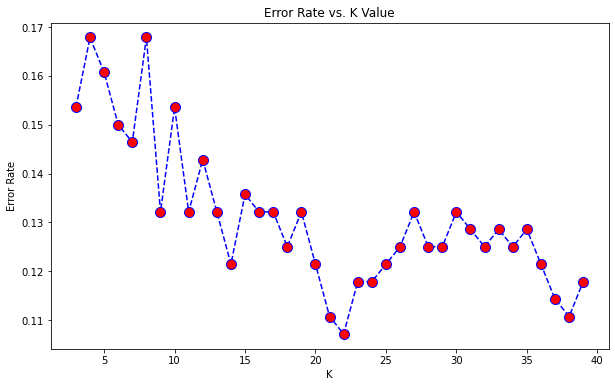

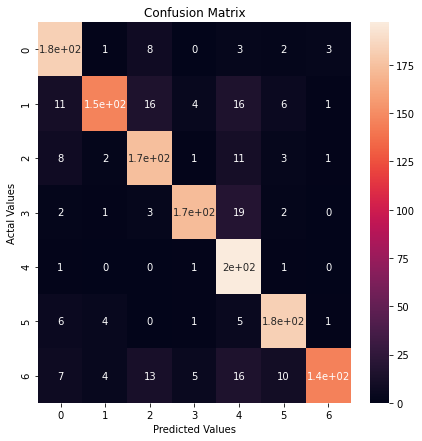

              precision    recall  f1-score   support

           a       0.84      0.92      0.88       200
           b       0.92      0.73      0.82       200
           c       0.81      0.87      0.84       200
           d       0.94      0.86      0.90       200
           e       0.74      0.98      0.84       200
           f       0.88      0.92      0.90       200
           g       0.96      0.72      0.83       200

    accuracy                           0.86      1400
   macro avg       0.87      0.86      0.86      1400
weighted avg       0.87      0.86      0.86      1400



The report for KNN with N-gram
The best value k is 3
Accuracy:0.15785714285714286


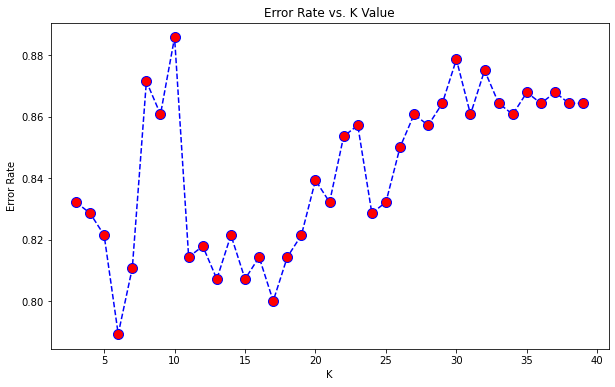

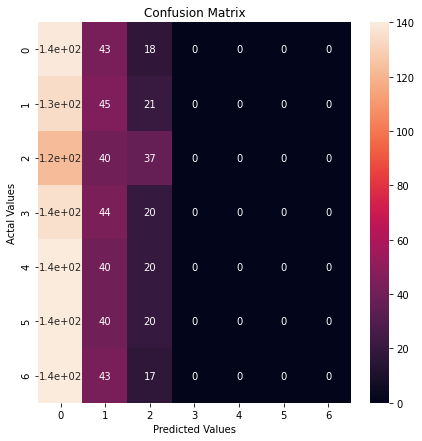

              precision    recall  f1-score   support

           a       0.15      0.69      0.24       200
           b       0.15      0.23      0.18       200
           c       0.24      0.18      0.21       200
           d       0.00      0.00      0.00       200
           e       0.00      0.00      0.00       200
           f       0.00      0.00      0.00       200
           g       0.00      0.00      0.00       200

    accuracy                           0.16      1400
   macro avg       0.08      0.16      0.09      1400
weighted avg       0.08      0.16      0.09      1400





D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier


for key in vectorizer_dict:
    error_rate = []
    for i in range(3,40):
        knn_clf = Pipeline([
            ('trans', vectorizer_dict[key]),
            ('clf', KNeighborsClassifier(n_neighbors=i))
        ])

        knn_clf.fit(x_train, y_train)
        pred = knn_clf.predict(x_test)
        error_rate.append(np.mean(pred != y_test))
    # find the optimal K
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,6))
    plt.plot(range(3,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    best_k = error_rate.index(min(error_rate))

    best_knn = Pipeline([
            ('trans', vectorizer_dict[key]),
            ('clf', KNeighborsClassifier(n_neighbors=best_k))
        ])
    print('The report for KNN with ' + key)
    print('The best value k is ' + str(best_k))
    analysis(best_knn, x, y)
    print('')
    print('')

# XGboots

In [212]:
import sys
!{sys.executable} -m pip install xgboost

The report for XGboots with BOW
Accuracy:0.8292857142857143


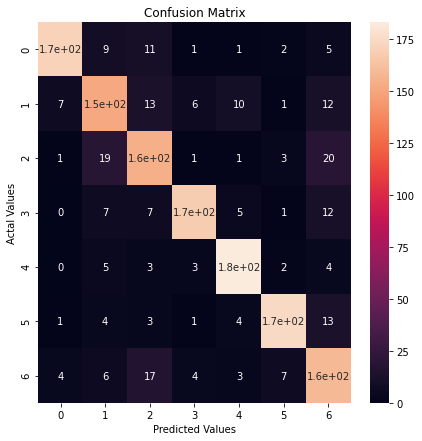

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       200
           1       0.75      0.76      0.75       200
           2       0.74      0.78      0.76       200
           3       0.91      0.84      0.87       200
           4       0.88      0.92      0.90       200
           5       0.92      0.87      0.89       200
           6       0.71      0.80      0.75       200

    accuracy                           0.83      1400
   macro avg       0.83      0.83      0.83      1400
weighted avg       0.83      0.83      0.83      1400



The report for XGboots with TF-IDF
Accuracy:0.8142857142857143


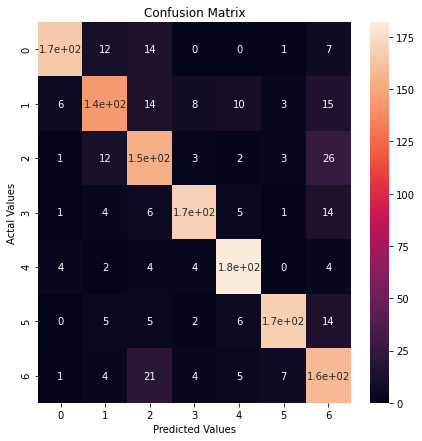

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       200
           1       0.79      0.72      0.75       200
           2       0.71      0.77      0.73       200
           3       0.89      0.84      0.87       200
           4       0.87      0.91      0.89       200
           5       0.92      0.84      0.88       200
           6       0.66      0.79      0.72       200

    accuracy                           0.81      1400
   macro avg       0.82      0.81      0.82      1400
weighted avg       0.82      0.81      0.82      1400



The report for XGboots with N-gram
Accuracy:0.5764285714285714


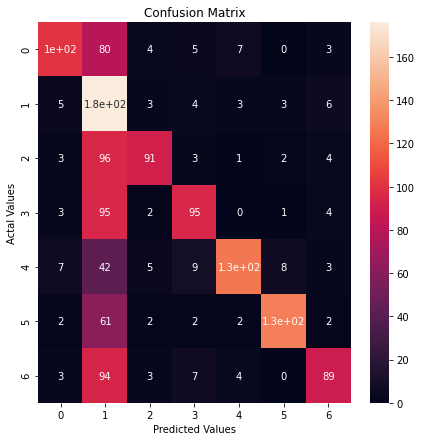

              precision    recall  f1-score   support

           0       0.81      0.51      0.62       200
           1       0.27      0.88      0.42       200
           2       0.83      0.46      0.59       200
           3       0.76      0.47      0.58       200
           4       0.88      0.63      0.73       200
           5       0.90      0.65      0.75       200
           6       0.80      0.45      0.57       200

    accuracy                           0.58      1400
   macro avg       0.75      0.58      0.61      1400
weighted avg       0.75      0.58      0.61      1400





In [213]:
y_gx = le.fit_transform(y)

for key in vectorizer_dict:
    xgboots_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', XGBClassifier())
    ])
    
    print('The report for XGboots with ' + key)
    analysis(xgboots_cfl, x, y_gx)
    
    print('')
    print('')

# Decision Tree -- find best value of max_depth

The report for DT with BOW
The best value of max depth is 10
Accuracy:0.5964285714285714


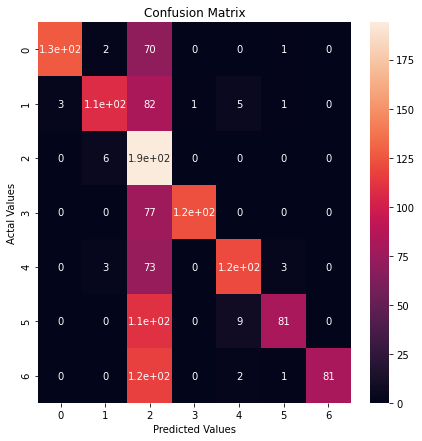

              precision    recall  f1-score   support

           a       0.98      0.64      0.77       200
           b       0.91      0.54      0.68       200
           c       0.27      0.97      0.42       200
           d       0.99      0.61      0.76       200
           e       0.88      0.60      0.72       200
           f       0.93      0.41      0.56       200
           g       1.00      0.41      0.58       200

    accuracy                           0.60      1400
   macro avg       0.85      0.60      0.64      1400
weighted avg       0.85      0.60      0.64      1400



The report for DT with TF-IDF
The best value of max depth is 10
Accuracy:0.5871428571428572


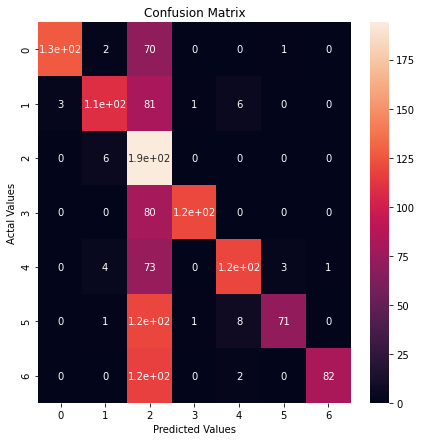

              precision    recall  f1-score   support

           a       0.98      0.64      0.77       200
           b       0.89      0.55      0.68       200
           c       0.26      0.97      0.42       200
           d       0.98      0.60      0.75       200
           e       0.88      0.59      0.71       200
           f       0.95      0.35      0.52       200
           g       0.99      0.41      0.58       200

    accuracy                           0.59      1400
   macro avg       0.85      0.59      0.63      1400
weighted avg       0.85      0.59      0.63      1400



The report for DT with N-gram
The best value of max depth is 10
Accuracy:0.30857142857142855


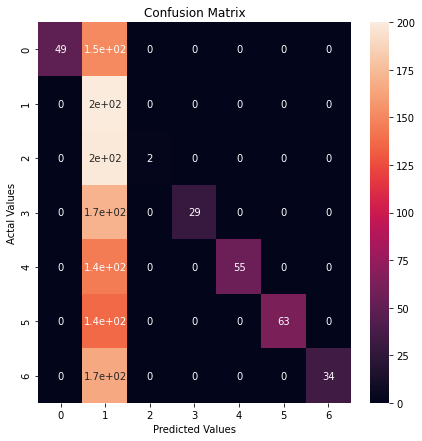

              precision    recall  f1-score   support

           a       1.00      0.24      0.39       200
           b       0.17      1.00      0.29       200
           c       1.00      0.01      0.02       200
           d       1.00      0.14      0.25       200
           e       1.00      0.28      0.43       200
           f       1.00      0.32      0.48       200
           g       1.00      0.17      0.29       200

    accuracy                           0.31      1400
   macro avg       0.88      0.31      0.31      1400
weighted avg       0.88      0.31      0.31      1400





In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

for key in vectorizer_dict:

    dt_clf = Pipeline([('vect', vectorizer_dict[key]),
             ('dt', DecisionTreeClassifier())])


    # Define the hyperparameter search space
    param_grid = {'dt__max_depth': range(1, 11)}

    # Create the grid search object
    grid_search = GridSearchCV(dt_clf, param_grid, cv=5)

    # Fit the grid search to the data
    grid_search.fit(x, y)

    # Get the best hyperparameters
    best_depth = grid_search.best_params_['dt__max_depth']
    
    print('The report for DT with ' + key)
    print('The best value of max depth is ' + str(best_depth))
    
    best_dt = Pipeline([
        ('trans', vectorizer_dict[key]),
        ('clf',  DecisionTreeClassifier(max_depth = best_depth))
        ])

    analysis(best_dt, x, y)
    
    print('')
    print('')


# SVM.SVC

The report for SVM.SVC with BOW
Accuracy:0.8471428571428572


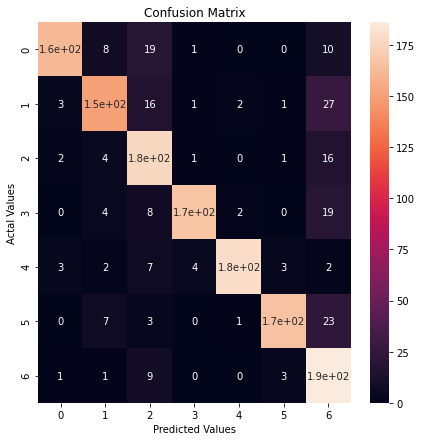

              precision    recall  f1-score   support

           a       0.95      0.81      0.87       200
           b       0.85      0.75      0.80       200
           c       0.74      0.88      0.80       200
           d       0.96      0.83      0.89       200
           e       0.97      0.90      0.93       200
           f       0.95      0.83      0.89       200
           g       0.66      0.93      0.77       200

    accuracy                           0.85      1400
   macro avg       0.87      0.85      0.85      1400
weighted avg       0.87      0.85      0.85      1400



The report for SVM.SVC with TF-IDF
Accuracy:0.9021428571428571


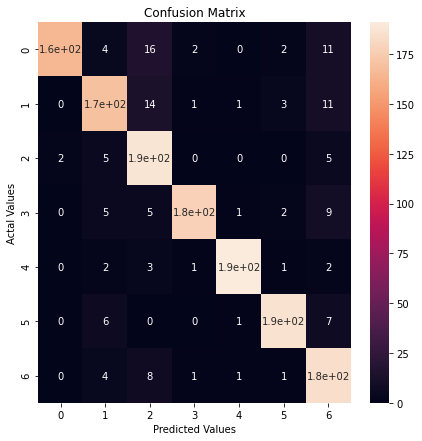

              precision    recall  f1-score   support

           a       0.99      0.82      0.90       200
           b       0.87      0.85      0.86       200
           c       0.80      0.94      0.87       200
           d       0.97      0.89      0.93       200
           e       0.98      0.95      0.97       200
           f       0.95      0.93      0.94       200
           g       0.80      0.93      0.86       200

    accuracy                           0.90      1400
   macro avg       0.91      0.90      0.90      1400
weighted avg       0.91      0.90      0.90      1400



The report for SVM.SVC with N-gram
Accuracy:0.2007142857142857


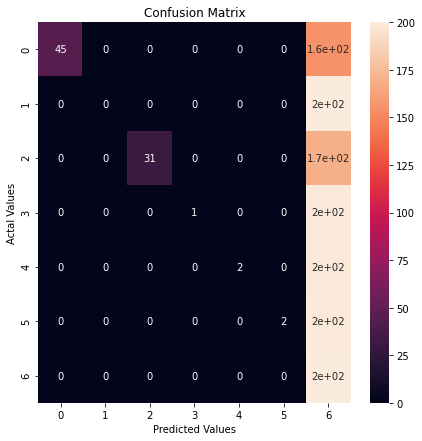

              precision    recall  f1-score   support

           a       1.00      0.23      0.37       200
           b       0.00      0.00      0.00       200
           c       1.00      0.15      0.27       200
           d       1.00      0.01      0.01       200
           e       1.00      0.01      0.02       200
           f       1.00      0.01      0.02       200
           g       0.15      1.00      0.26       200

    accuracy                           0.20      1400
   macro avg       0.74      0.20      0.14      1400
weighted avg       0.74      0.20      0.14      1400





D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
from sklearn import svm

for key in vectorizer_dict:
    svc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', svm.SVC())
    ])
    
    print('The report for SVM.SVC with ' + key)
    analysis(svc_cfl, x, y)
    
    print('')
    print('')

# LinearSVC

The report for LinearSVC with BOW
Accuracy:0.8885714285714286


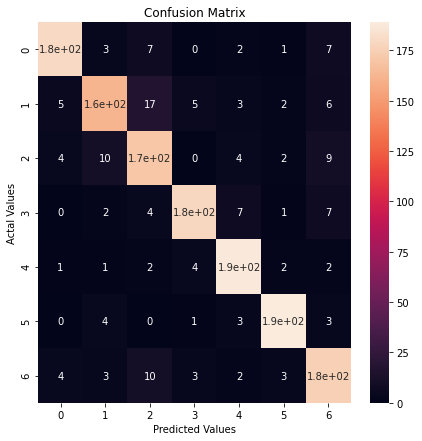

              precision    recall  f1-score   support

           a       0.93      0.90      0.91       200
           b       0.88      0.81      0.84       200
           c       0.81      0.85      0.83       200
           d       0.93      0.90      0.91       200
           e       0.90      0.94      0.92       200
           f       0.94      0.94      0.94       200
           g       0.84      0.88      0.86       200

    accuracy                           0.89      1400
   macro avg       0.89      0.89      0.89      1400
weighted avg       0.89      0.89      0.89      1400



The report for LinearSVC with TF-IDF
Accuracy:0.915


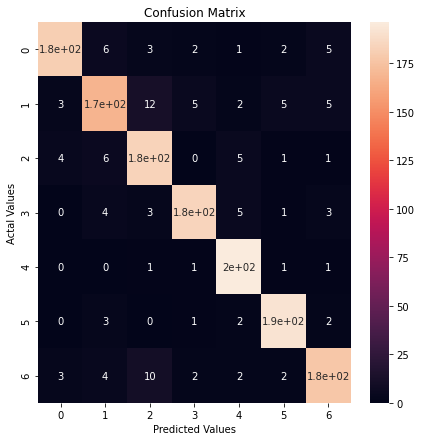

              precision    recall  f1-score   support

           a       0.95      0.91      0.93       200
           b       0.88      0.84      0.86       200
           c       0.86      0.92      0.89       200
           d       0.94      0.92      0.93       200
           e       0.92      0.98      0.95       200
           f       0.94      0.96      0.95       200
           g       0.91      0.89      0.90       200

    accuracy                           0.92      1400
   macro avg       0.92      0.92      0.91      1400
weighted avg       0.92      0.92      0.91      1400



The report for LinearSVC with N-gram
Accuracy:0.75


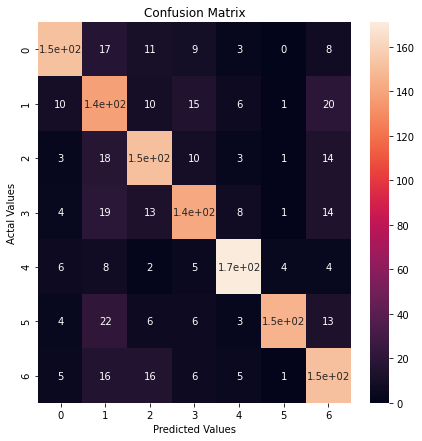

              precision    recall  f1-score   support

           a       0.83      0.76      0.79       200
           b       0.58      0.69      0.63       200
           c       0.72      0.76      0.74       200
           d       0.73      0.70      0.72       200
           e       0.86      0.85      0.86       200
           f       0.95      0.73      0.82       200
           g       0.67      0.76      0.71       200

    accuracy                           0.75      1400
   macro avg       0.76      0.75      0.75      1400
weighted avg       0.76      0.75      0.75      1400





In [151]:
from sklearn.svm import LinearSVC

for key in vectorizer_dict:
    linearsvc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', LinearSVC())
    ])
    
    print('The report for LinearSVC with ' + key)
    analysis(linearsvc_cfl, x, y)
    
    print('')
    print('')

# SGD

The report for SGD with BOW
Accuracy:0.8492857142857143


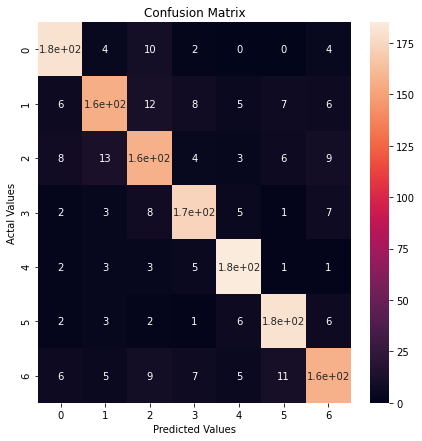

              precision    recall  f1-score   support

           a       0.87      0.90      0.89       200
           b       0.83      0.78      0.81       200
           c       0.78      0.79      0.78       200
           d       0.87      0.87      0.87       200
           e       0.89      0.93      0.90       200
           f       0.87      0.90      0.89       200
           g       0.83      0.79      0.81       200

    accuracy                           0.85      1400
   macro avg       0.85      0.85      0.85      1400
weighted avg       0.85      0.85      0.85      1400



The report for SGD with TF-IDF
Accuracy:0.9157142857142857


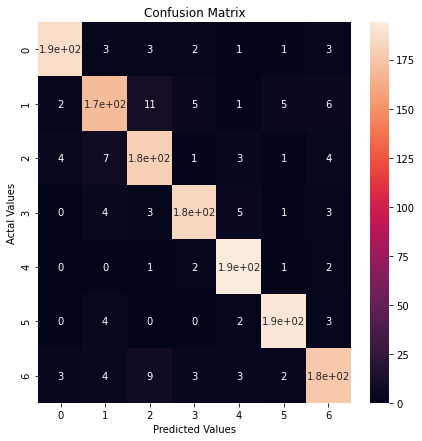

              precision    recall  f1-score   support

           a       0.95      0.94      0.94       200
           b       0.89      0.85      0.87       200
           c       0.87      0.90      0.88       200
           d       0.93      0.92      0.93       200
           e       0.93      0.97      0.95       200
           f       0.95      0.95      0.95       200
           g       0.89      0.88      0.89       200

    accuracy                           0.92      1400
   macro avg       0.92      0.92      0.92      1400
weighted avg       0.92      0.92      0.92      1400



The report for SGD with N-gram
Accuracy:0.7178571428571429


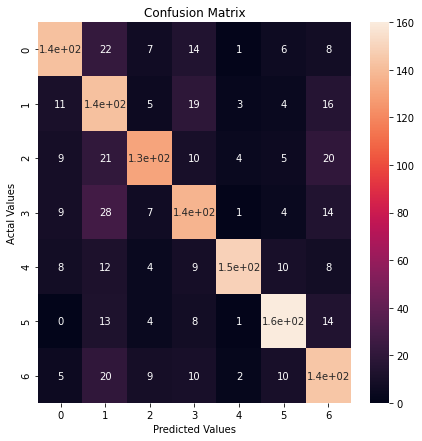

              precision    recall  f1-score   support

           a       0.77      0.71      0.74       200
           b       0.55      0.71      0.62       200
           c       0.78      0.66      0.71       200
           d       0.66      0.69      0.67       200
           e       0.93      0.74      0.83       200
           f       0.80      0.80      0.80       200
           g       0.64      0.72      0.68       200

    accuracy                           0.72      1400
   macro avg       0.73      0.72      0.72      1400
weighted avg       0.73      0.72      0.72      1400





In [152]:
from sklearn.linear_model import SGDClassifier

for key in vectorizer_dict:
    linearsvc_cfl = Pipeline([
    ('trans', vectorizer_dict[key]),
    ('clf', SGDClassifier())
    ])
    
    print('The report for SGD with ' + key)
    analysis(linearsvc_cfl, x, y)
    
    print('')
    print('')

# Best Model tf-idf * LinearSVC adn tf-idf * SGD

In [159]:
best_model = Pipeline([
    ('trans', TfidfVectorizer(stop_words=sw_nltk)),
    ('clf', LinearSVC())
    ])



In [160]:
def test(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy = np.mean(pred == y_test)

    print("accuracy: " + str(accuracy))

    unique_labels = np.unique(df['label'])
    cf_matrix = confusion_matrix(y_test, pred)
    draw_confusion_matrix(cf_matrix, unique_labels)
    print (classification_report(y_test, pred))

The performance of the best model on test set:
accuracy: 0.9428571428571428


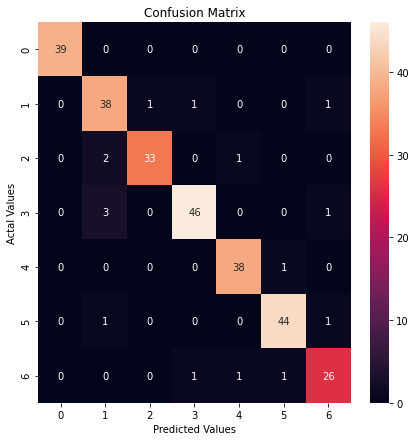

              precision    recall  f1-score   support

           a       1.00      1.00      1.00        39
           b       0.86      0.93      0.89        41
           c       0.97      0.92      0.94        36
           d       0.96      0.92      0.94        50
           e       0.95      0.97      0.96        39
           f       0.96      0.96      0.96        46
           g       0.90      0.90      0.90        29

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



In [161]:
print('The performance of the best model on test set:')
test(best_model,  x_train, y_train, x_test, y_test)

# Error Analysis

## 1. Data

### For our best model. If we use the unbanlenced data, we will get different results

#### a), Change the train test split ratio

In [162]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.9)

The performance of the best model on unbanlenced test set1:
accuracy: 0.8


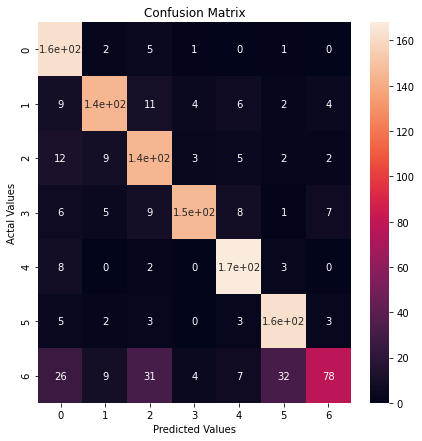

              precision    recall  f1-score   support

           a       0.71      0.95      0.81       172
           b       0.84      0.80      0.82       181
           c       0.70      0.81      0.76       178
           d       0.92      0.80      0.86       182
           e       0.85      0.93      0.89       181
           f       0.80      0.91      0.85       179
           g       0.83      0.42      0.56       187

    accuracy                           0.80      1260
   macro avg       0.81      0.80      0.79      1260
weighted avg       0.81      0.80      0.79      1260



In [194]:
print('The performance of the best model on unbanlenced test set1:')
test(best_model,  x1_train, y1_train, x1_test, y1_test)

####  b) Make the training set and test set unbanlenced.

In [203]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
df_train = pd.DataFrame()
df_test = pd.DataFrame()

for label in labels:
    
    if label != 'e':
        df_train = df_train.append(df[df['label']==label][:180])
        df_test = df_test.append(df[df['label']==label][180:])
    else:
        df_train = df_train.append(df[df['label']==label][:20])
        df_test = df_test.append(df[df['label']==label][20:])
        

x2_train = df_train['partition']
y2_train = df_train['label']
x2_test = df_test['partition']
y2_test = df_test['label']

The performance of the best model on unbanlenced test set2:
accuracy: 0.5266666666666666


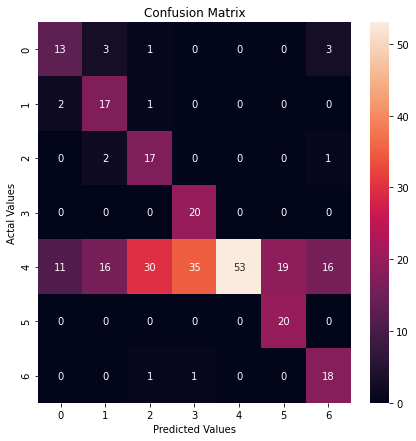

              precision    recall  f1-score   support

           a       0.50      0.65      0.57        20
           b       0.45      0.85      0.59        20
           c       0.34      0.85      0.49        20
           d       0.36      1.00      0.53        20
           e       1.00      0.29      0.45       180
           f       0.51      1.00      0.68        20
           g       0.47      0.90      0.62        20

    accuracy                           0.53       300
   macro avg       0.52      0.79      0.56       300
weighted avg       0.78      0.53      0.50       300



In [204]:
print('The performance of the best model on unbanlenced test set2:')
test(best_model,  x2_train, y2_train, x2_test, y2_test)


## It caused overfitting! Since the performance on training set is better than test set.

## 2. Feature Engineering.

### Different transformer also can influence the result. In this project, the N-gram transformer didn't perform well and it caused the underfitting. Since the performance on training set and test set is both bad.

### In future, we need find some better hyper parameters to train a better N-gram transformer.

## 3. Classifier

### Different classifier also can influence the result. In this project, we found that the LinerSVC is a better classifier for this case

# Golden data is the most important thing!